In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
full_data=pd.read_csv('Project/bank-full (1).csv',sep=';',na_values='None')

In [6]:
full_data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


# Statistical Analysis of the Data

In [7]:
df=full_data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Check Null Values

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Exploratory Data Analysis

In [24]:
# Identify the Categorical and Numerical Columns
catcols=df.select_dtypes(include=['object']).columns.to_list()
numcols=[col for col in df.columns if col not in catcols]

In [25]:
print('Numeric columns: {}'.format(numcols))
print()
print('Categorical Columns: {}'.format(catcols))

Numeric columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


# Analysis of Numerical Columns

## Analysis of Age

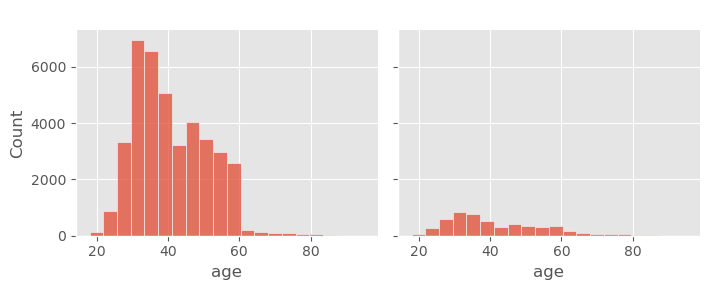

In [26]:
g=sns.FacetGrid(data=df,col='y',height=3,aspect=1.2)
g.map(sns.histplot,'age',bins=20)
plt.show()

<AxesSubplot: xlabel='age', ylabel='y'>

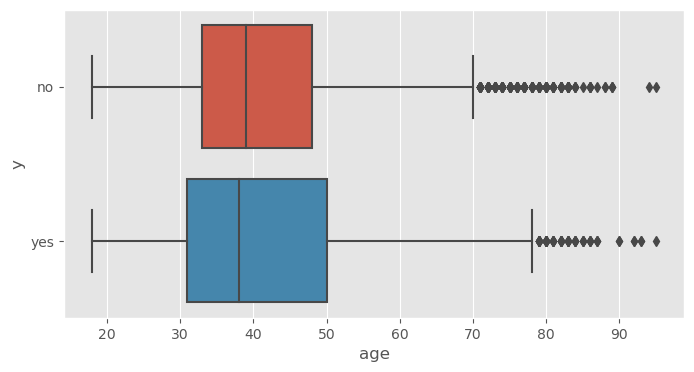

In [27]:
# Let's check out the Outlier with the help of Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='age',y='y',data=df)

Inference: In case of 'Not-Subscribed', 70 yrs+ is considered outlier, while for 'Subscribed' it is 75 yrs+. Considering the amount of outliers from both the groups, it can be said that the age is not a good predictor for the target variable. Hence it would be more beneficial to either drop this column or supress the outlier numbers.

## Analysis of Balance

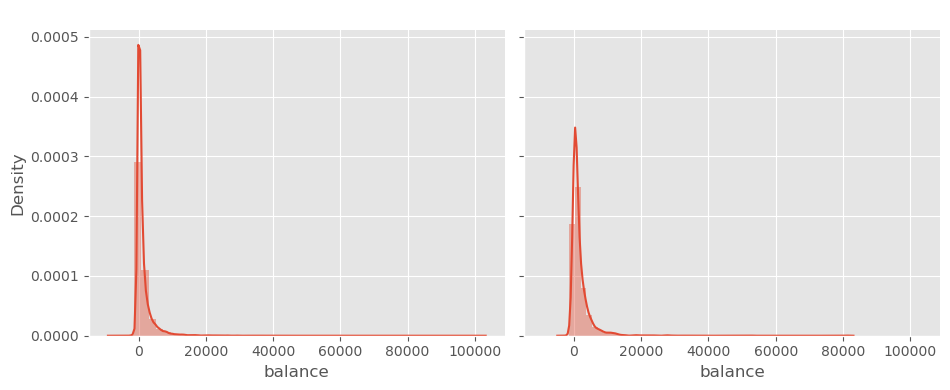

In [28]:
g=sns.FacetGrid(data=df,col='y',height=4,aspect=1.2)
g.map(sns.distplot,'balance')
plt.show()

<AxesSubplot: xlabel='balance', ylabel='y'>

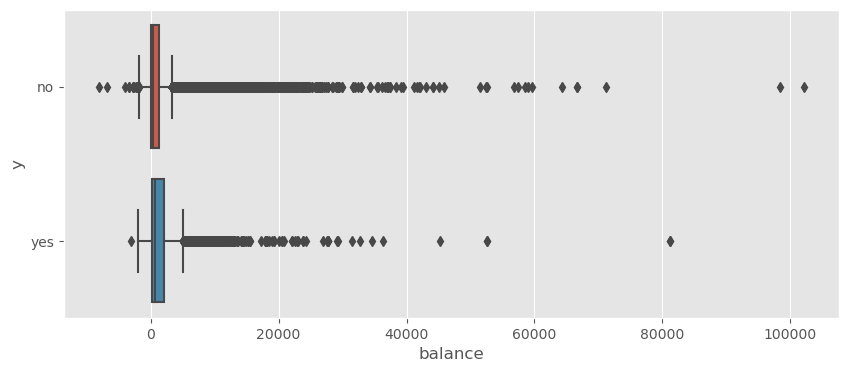

In [29]:
# Let's visualize the Outliers in Balance Column
plt.figure(figsize=(10,4))
sns.boxplot(x='balance',y='y',data=df)

Distribution of balance is similar in both the group: 'Subscribed' and 'Not Surscribed'. Hence, it is not a good predictor for the target variable. as the variance between the required data and the outliers is very high.

## Analysis of Day

<AxesSubplot: xlabel='day', ylabel='count'>

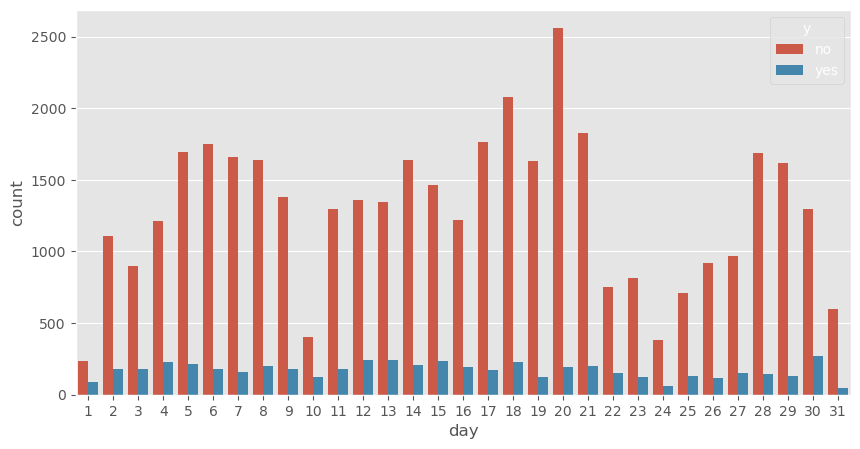

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x='day',data=df, hue='y')

Most of the calls made during 12-21st of the Month, and then some between 4-8th and some during 28-30th of the month. The increase in the starting of the month is mainly due the recieving of the salary in the starting of the month, hence many people might be trying to follow a term plan. Then to follow up after a cooling period of 2 weeks at the end of the month if people are looking to invest their monthly savings, the calls are made again. As can be seen from the plot the acceptance rate is also high, at the starting and ending of the month.

## Analysis of Duration

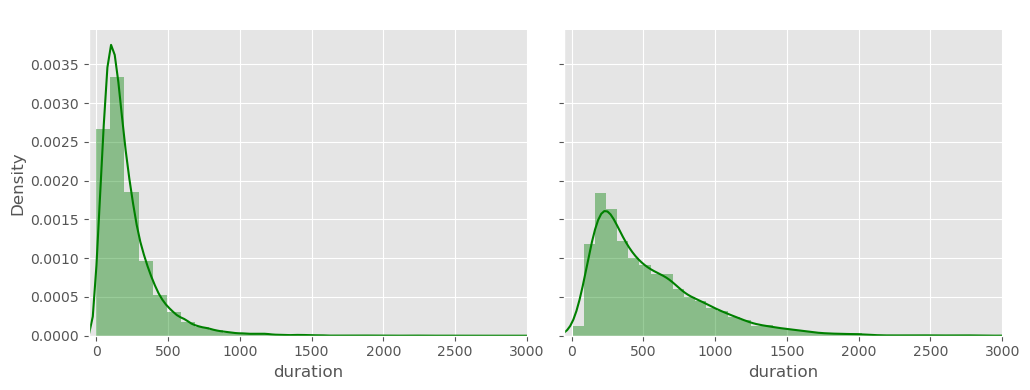

In [60]:
g=sns.FacetGrid(data=df,col='y',height=4,aspect=1.3,sharey=True,xlim=(-50,3000))
g.map(sns.distplot,'duration',color='green')

The duration period used here is in seconds.

<AxesSubplot: xlabel='duration', ylabel='y'>

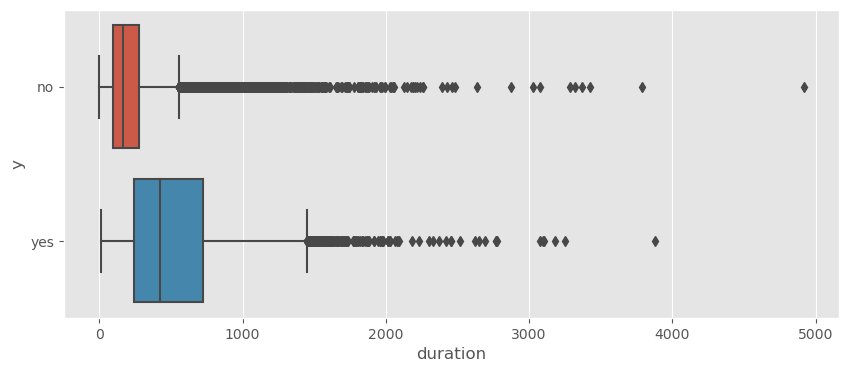

In [32]:
# Outlier visualization of duration
plt.figure(figsize=(10,4))
sns.boxplot(x='duration',y='y',data=df)

So, we see that longer calls gave more results in terms of subscription. This is because the longer the call, the more time the customer has spent with the agent, and hence the more likely he is to subscribe. This can be seen that longer duration also enbaled the customer to be able to understand the policy easily thus increasing the accentance rate.

## Analysis of Campaign

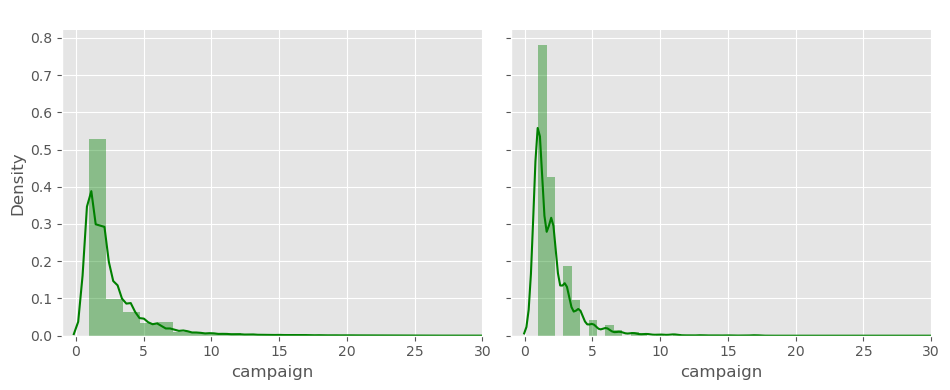

In [72]:
g=sns.FacetGrid(data=df,col='y',height=4,aspect=1.2,xlim=(-1,30))
g.map(sns.distplot,'campaign',color='green')

From the plots it is evident that most of the calls have been made to the customers who have been contacted for the first time. The acceptance rate is also high for the first time calls. The acceptance rate decreases as the number of calls increases. This is because the customer might be getting irritated by the number of calls and might not be interested in the policy. Considering the acceptance rate, it is better to call the customer only upto 3 or 4 times.

## Analysis of pdays

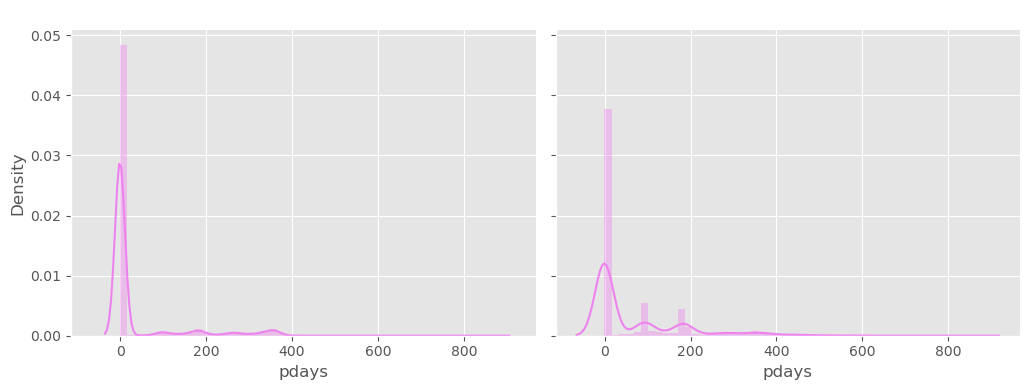

In [75]:
g=sns.FacetGrid(data=df,col='y',height=4,aspect=1.3)
g.map(sns.distplot,'pdays', color='violet')

For most of the customers, they are being contacted for the first time in this campaign.  
However, some people who have been called 100 or 200 days ago during previous campaign have also been converted in this campaign.  
It also indicates that this Bank probably runs the campaign after every 100 days.

## Analysis of Previous

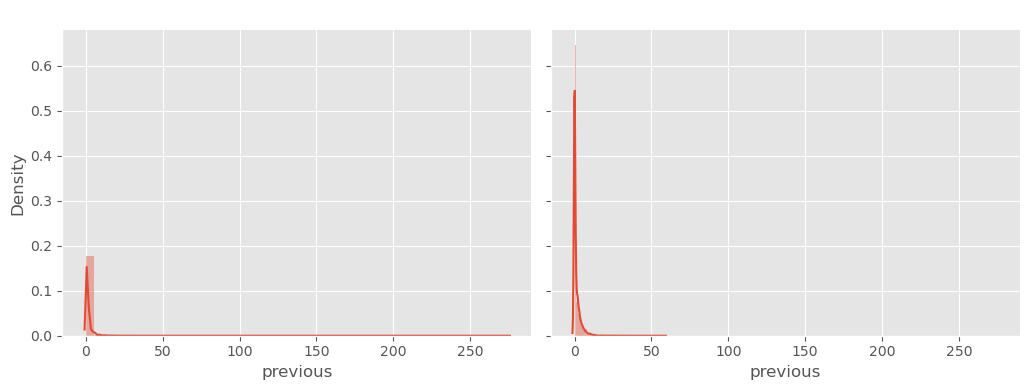

In [35]:
g=sns.FacetGrid(data=df,col='y',height=4,aspect=1.3)
g.map(sns.distplot,'previous')

From the plot, we can say that most of the customers have not been contacted before this campaign.

# Analysis of Categorical Columns

## Analysis of Job

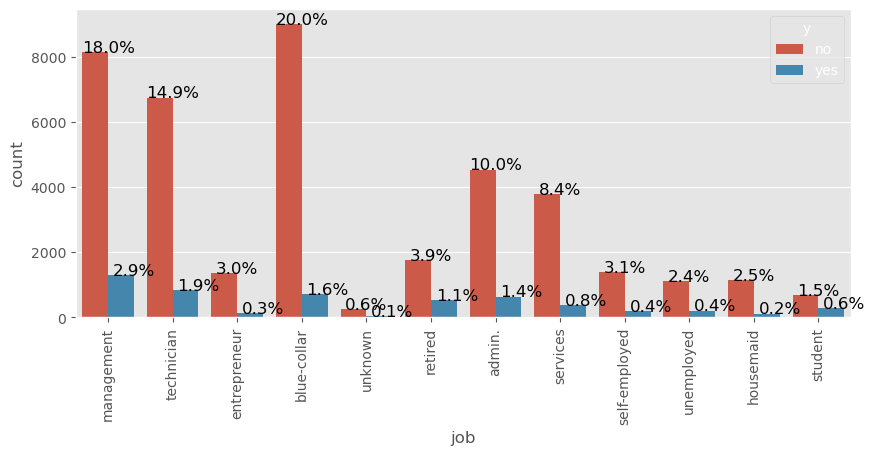

In [99]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x='job',data=df, hue='y')
plt.xticks(rotation='vertical')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', color='black',size=12)
plt.show()

So, most of the contacted customers are from Blue-collar, Management, technician and admin jobs. While most of the people from management, technician, self-employed, unemployed, retired and student jobs have subscribed to the policy..

## Analysis of Marital

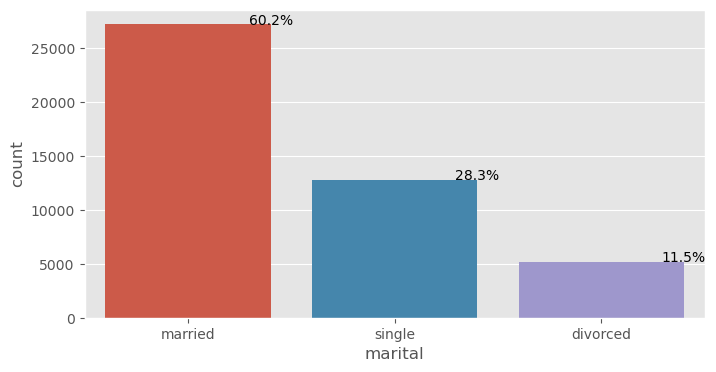

In [100]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='marital',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', color='black')
plt.show()

Most of the customers contacted are married.

## Analysis of Education

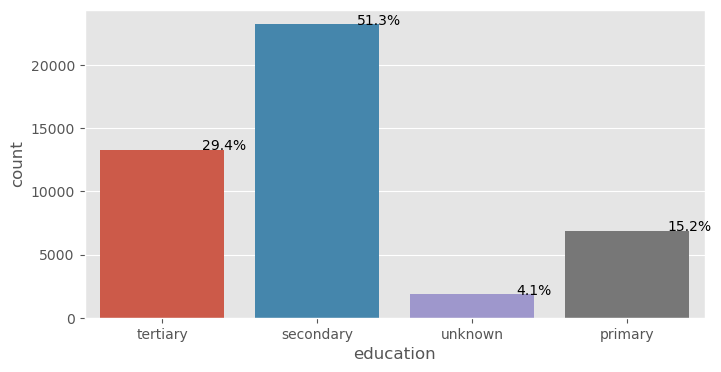

In [101]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='education',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', color='black')

Majority of the customers have Secondary education and beyond.

## Analysis of Default

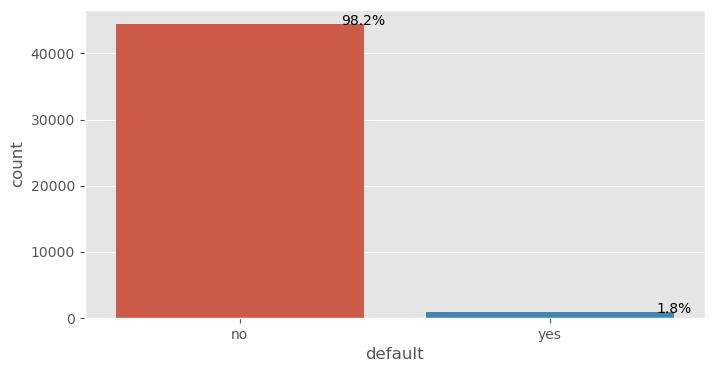

In [102]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='default',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', color='black')

Since majority of the customers have not defaulted, it can be said that this column has very low varioance, thus not a good predictor for the target variable.

## Analysis of Housing

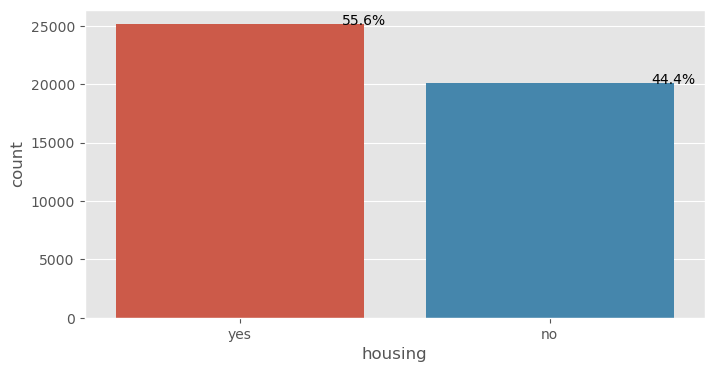

In [103]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='housing',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', color='black')

The split in the prople who have taken loand and who have not is almost equal.

## Analysis of Contact

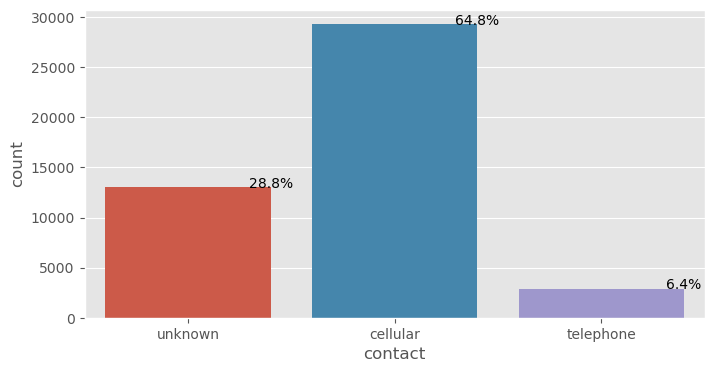

In [98]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='contact',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', color='black')

Majority of customers were contacted via cellphones

## Analysis of Loan

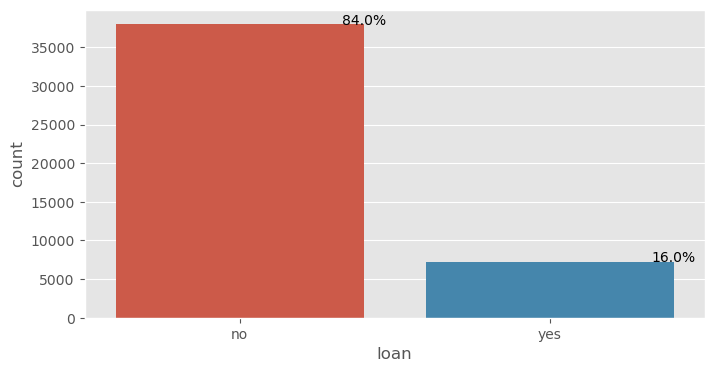

In [119]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='loan',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', color='black')

 Majority of customers haven't taken any personal loan

## Analysis of Month

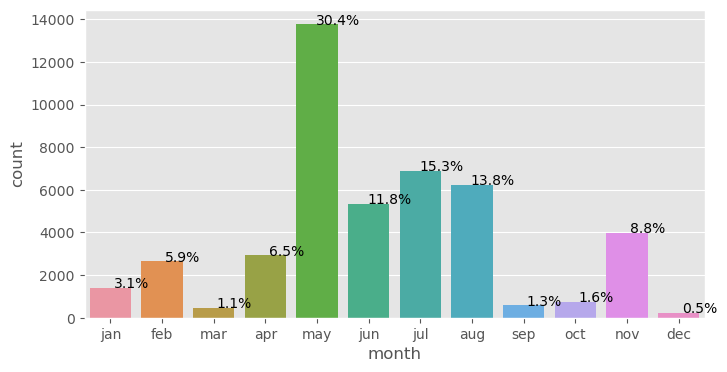

In [105]:
plt.figure(figsize=(8,4))
months=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
ax=sns.countplot(x='month',data=df,order=months)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', color='black')

Most of the people were called during May-Aug, and November during the current campaign.

## Analysis of poutcome (Previous campaign outcome)

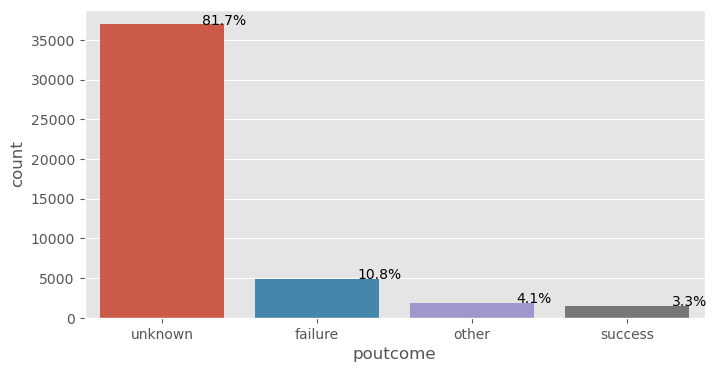

In [106]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='poutcome',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', color='black')

Most of the Previous campaign outcomes are unknown, so better data collection is needed, from the previous campaign.

## Analysis of y (Customer Subscribed to Term deposit or not)

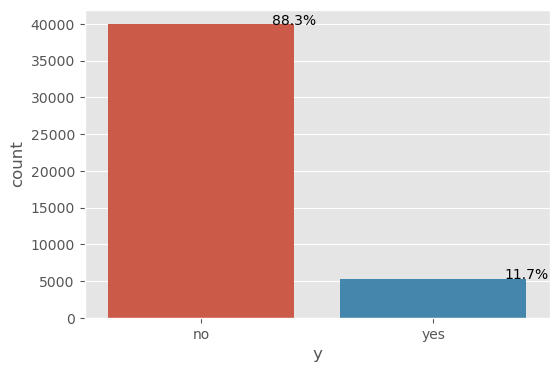

In [107]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='y',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', color='black')

In [78]:
yes_candiated = df[df['y']=='yes']
no_candiated = df[df['y']=='no']

amount_subscribed = yes_candiated['y'].count()
percentage_subscribed = (amount_subscribed/len(df))*100
print(percentage_subscribed)

11.698480458295547


So, in our current campaign only 11.70% of clients are subscribing. So we need to improve our run-rate by better targeting.
We can decrease our operational resources by improving the prediction of who is going to subscribe, and who is not.
As well as improve our targetting rate by taking into account about the percentage of success considering each of the features.

# Analysis of Features with respect to the Target Variable

## Relationship of Campaign success with age

In [80]:
# Discretize the age Column to age group
from sklearn.preprocessing import KBinsDiscretizer
disc=KBinsDiscretizer(n_bins=6,strategy='quantile',encode='ordinal')

In [81]:
disc.fit(df[['age']])

KBinsDiscretizer(encode='ordinal', n_bins=6)

In [82]:
df['age_rank']=disc.transform(df[['age']])

In [83]:
disc.bin_edges_

array([array([18., 31., 35., 39., 45., 52., 95.])], dtype=object)

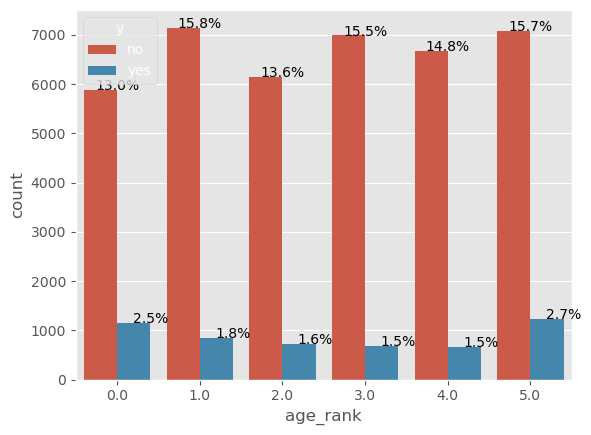

In [112]:
ax=sns.countplot(data=df,x='age_rank',hue='y')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', color='black')

We can see from the plot that the subscription rate is high for the age group of youngest (18-31 yrs). and oldest (75-95 yrs). This is because the youngest people are just starting their career and are looking for a term plan to secure their future. While the oldest people are looking to invest their savings. The subscription rate is low for the middle age group (31-60 yrs). This is because the middle age group people are more focused on their family and children, and are not looking to invest in term plans. Hence it would be better to target these age groups.

In [85]:
def age_group(age):
    if age<32:
        return 'young'
    elif age<50:
        return 'middle'
    else:
        return 'senior'

In [86]:
df['age_group']=df['age'].map(age_group)

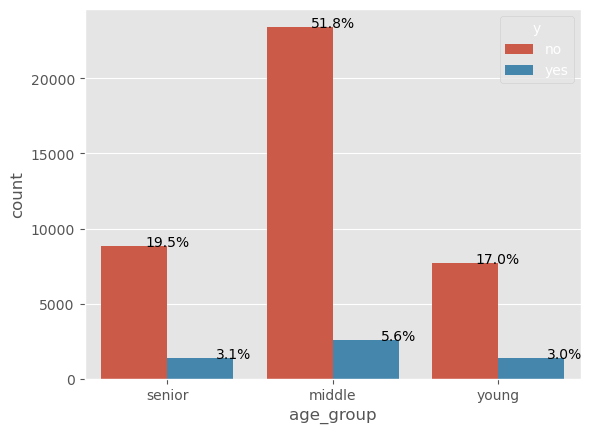

In [113]:
ax=sns.countplot(data=df,x='age_group',hue='y')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', color='black')

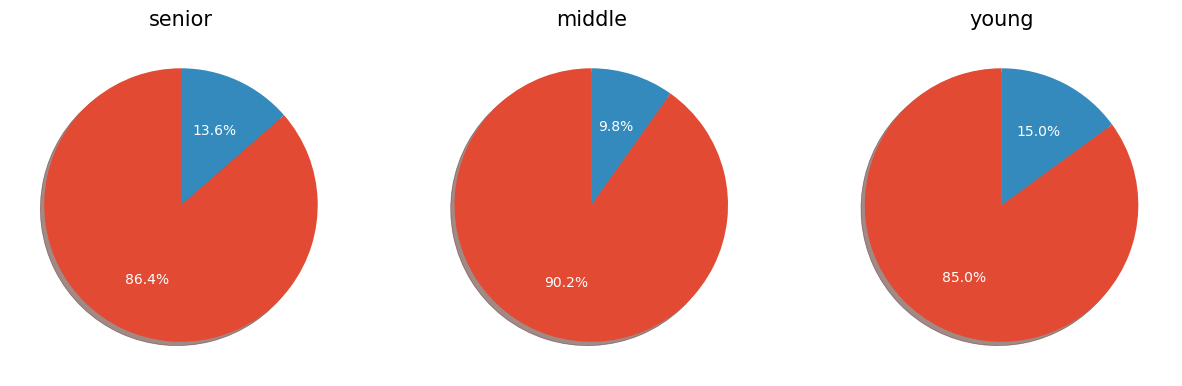

In [114]:
fig,ax=plt.subplots(1,df['age_group'].nunique(),figsize=(15,20))
for i,col in enumerate(df['age_group'].unique()):
    ax[i].pie(x=df[df['age_group']==col]['y'].value_counts(), labels=df[df['age_group']==col]['y'].value_counts().index,autopct='%1.1f%%', shadow=True, startangle=90)
    ax[i].set_title(col, color='black', fontsize=15)

People with age group of 32-50 yrs, have had low subscription rate, while older and younger people have had higher subcription rate. From the above graph it can also be seen that the number of peeople being contacted is also high for the age group of 32-50 yrs. Hence, it would be better to target the younger (less than 32 yrs) and older (more than 50 yrs) people, as the subscription rate is high for them.

## Relationship of Campaign success with Job-type

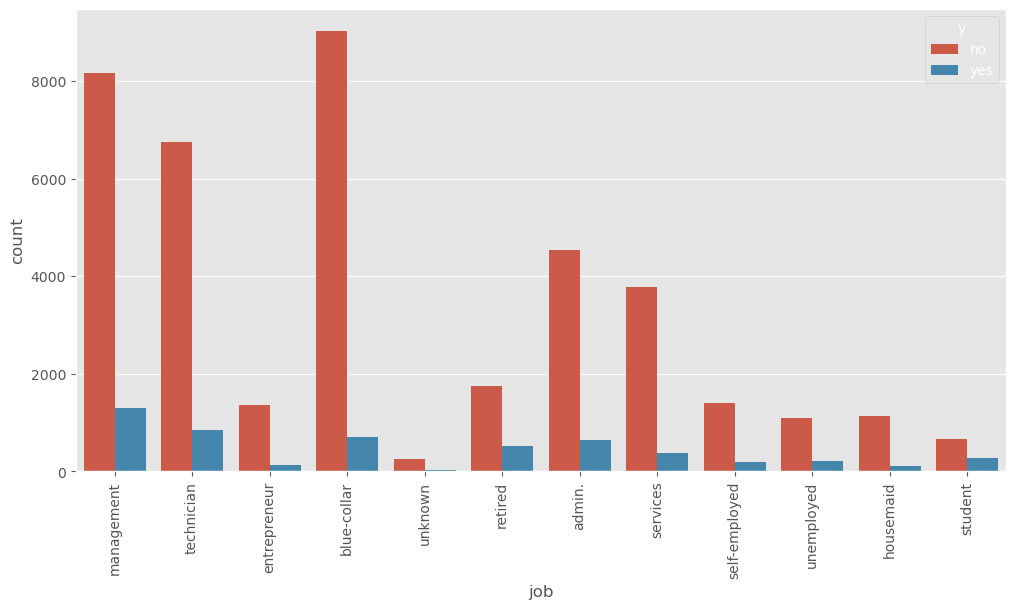

In [88]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='job',hue='y')
plt.xticks(rotation='vertical')
plt.show()

Since most of the job rpofiles are similar, we will be grouping them under same categories

In [89]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [90]:
def job_new(job):
    if job in ['self-employed','housemaid','entrepreneur']:
        return 'self_employed'
    elif job in ['unknown','unemployed','student']:
        return 'unemployed'
    elif job in ['blue-collar','services']:
        return 'blue_collar'
    else:
        return job

In [91]:
df['job_type']=df['job'].map(job_new)

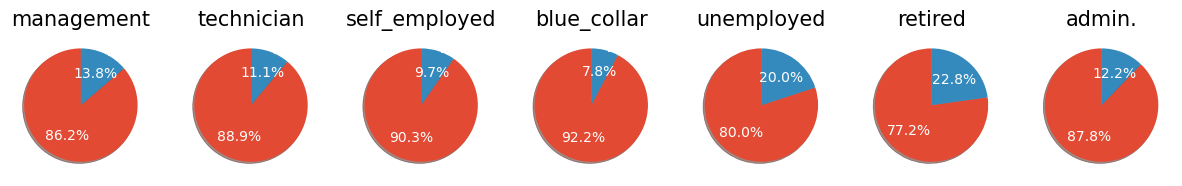

In [96]:
fig,ax=plt.subplots(1,df['job_type'].nunique(),figsize=(15,20))
for i,col in enumerate(df['job_type'].unique()):
    ax[i].pie(x=df[df['job_type']==col]['y'].value_counts(), labels=df[df['job_type']==col]['y'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
    ax[i].set_title(col, color='black', fontsize=15)

The subscription rate among retired and unemployed people is high, while it is moderate for management, technician and admin. The subcription rate is lowest amongst self-employed, and blue-collar. Hence, it would be better to target the retired and unemployed people, as the subscription rate is high for them.

## Relationship of Campaign success with Marital Status

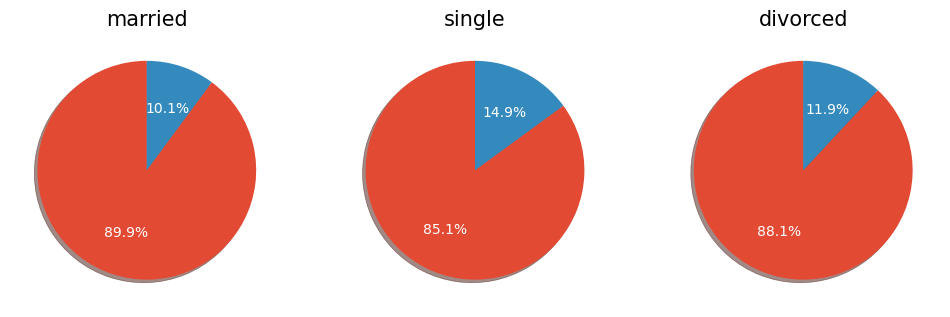

In [117]:
fig,ax=plt.subplots(1,3,figsize=(12,8))
for i,col in enumerate(df['marital'].unique()):
    ax[i].pie(x=df[df['marital']==col]['y'].value_counts(), labels=df[df['marital']==col]['y'].value_counts().index,autopct='%1.1f%%', shadow=True, startangle=90)
    ax[i].set_title(col, color='black', fontsize=15)

Single people have higher subscription rate, while married people have moderate subscription rate. Divorced people have the lowest subscription rate. Hence, it would be better to target the single people, as the subscription rate is high for them. However, since the number of married people is high, it would be better to target them as well.

## Relationship of Campaign success with Education Level

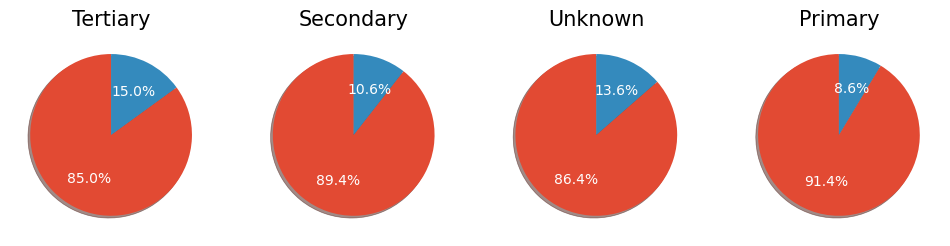

In [120]:
fig,ax=plt.subplots(1,df['education'].nunique(),figsize=(12,10))
for i,col in enumerate(df['education'].unique()):
    ax[i].pie(x=df[df['education']==col]['y'].value_counts(), labels=df[df['education']==col]['y'].value_counts().index,autopct='%1.1f%%', shadow=True, startangle=90)
    ax[i].set_title(col.capitalize(), color='black', fontsize=15)

People with tertiary level education have high subcription rate, while people with secondary level education have moderate subscription rate. People with primary level education have the lowest subscription rate. Hence, it would be better to target the people with tertiary level education, as the subscription rate is high for them. However, since the number of people with secondary level education is high, it would be better to target them as well.

## Relationship of Campaign success with Yearly Balance

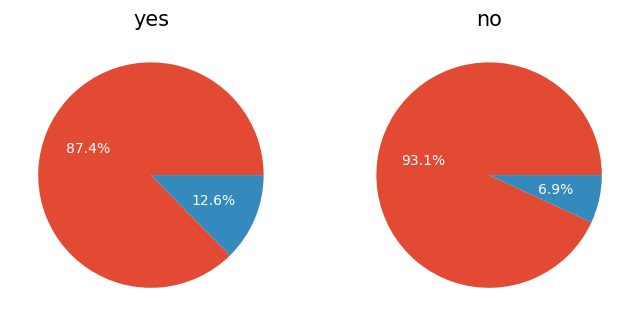

In [122]:
fig,ax=plt.subplots(1,df['balance_pos'].nunique(),figsize=(8,6))
for i,col in enumerate(df['balance_pos'].unique()):
    ax[i].pie(x=df[df['balance_pos']==col]['y'].value_counts(),
              labels=df[df['balance_pos']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col, color='black', fontsize=15)

As seen, People with positive balance, are seen to have subcribed more, compared to the negative ones. Hence, it would be better to target the people with positive balance, as the subscription rate is high for them.

In [124]:
# lets discretize the balance column
disc_bal=KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')
disc_bal.fit(df[['balance']])
df['balance_rank']=disc_bal.transform(df[['balance']])

In [125]:
disc_bal.bin_edges_

array([array([-8.01900e+03,  0.00000e+00,  2.20000e+01,  1.31000e+02,
               2.72000e+02,  4.48000e+02,  7.01000e+02,  1.12600e+03,
               1.85900e+03,  3.57400e+03,  1.02127e+05])             ],
      dtype=object)

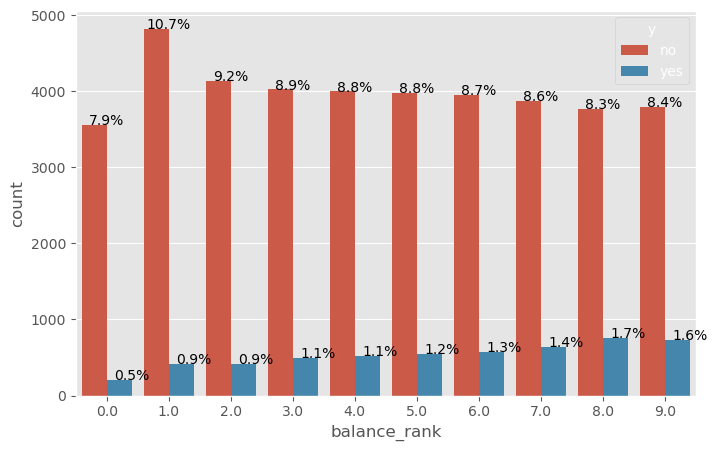

In [127]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df,x='balance_rank',hue='y')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', color='black')

As the balance increases, the subscription rate also increases. Hence, it would be better to target the people with higher balance, as the subscription rate is high for them.

Choosing the ranking of the balance.

In [128]:
def bal_range(bal):
    if bal<22:
        return 'low_bal'
    elif bal<440:
        return 'medium_bal'
    elif bal<1500:
        return 'high_bal'
    else:
        return 'very_high_bal'

In [129]:
df['bal_range']=df['balance'].map(bal_range)

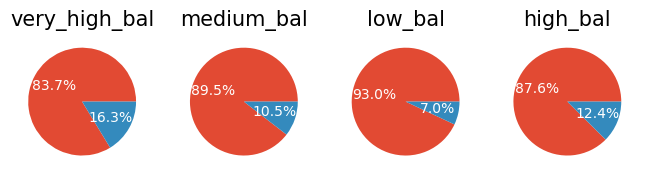

In [131]:
fig,ax=plt.subplots(1,df['bal_range'].nunique(),figsize=(8,6))
for i,col in enumerate(df['bal_range'].unique()):
    ax[i].pie(x=df[df['bal_range']==col]['y'].value_counts(),
              labels=df[df['bal_range']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col, color='black', fontsize=15)

The subscription rat eof people with balance more than 450 is high, while people with low balance have low subcription rate, hence it would be beneficial to target the people with balance more than 450.

## Relationship of Campaign success with Housing Loan Status

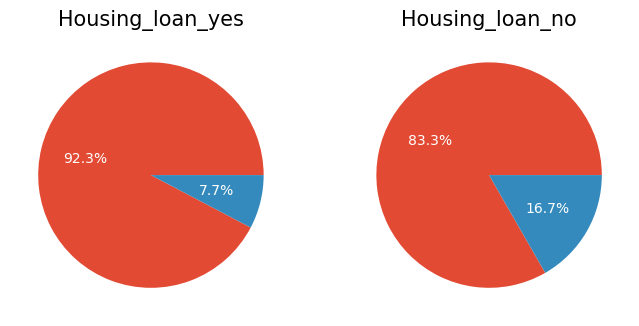

In [134]:
fig,ax=plt.subplots(1,df['housing'].nunique(),figsize=(8,6))
for i,col in enumerate(df['housing'].unique()):
    ax[i].pie(x=df[df['housing']==col]['y'].value_counts(),
              labels=df[df['housing']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title('Housing_loan_'+col, color='black', fontsize=15)

People who haven't taken any housing loan are seen to have subcribed more, compared to the ones who have taken. Hence, it would be better to target the people who haven't taken any housing loan, as the subscription rate is high for them.

## Relationship of Campaign success with Personal Loan status

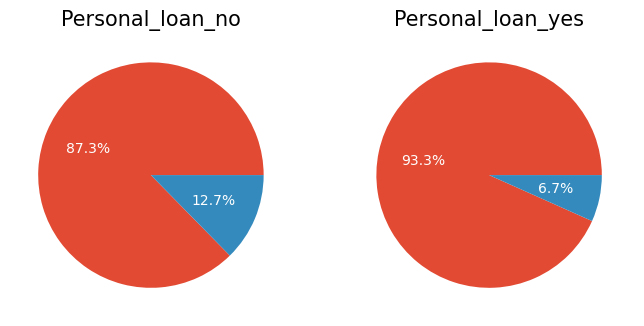

In [136]:
fig,ax=plt.subplots(1,df['loan'].nunique(),figsize=(8,6))
for i,col in enumerate(df['loan'].unique()):
    ax[i].pie(x=df[df['loan']==col]['y'].value_counts(),
              labels=df[df['loan']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title('Personal_loan_'+col, color='black', fontsize=15)

People with personal loan are seen to have subscribed less, compared to the ones who haven't taken. Hence, it would be better to target the people who haven't taken any personal loan, as the subscription rate is high for them.

## Relationship of Campaign success with Contact Medium

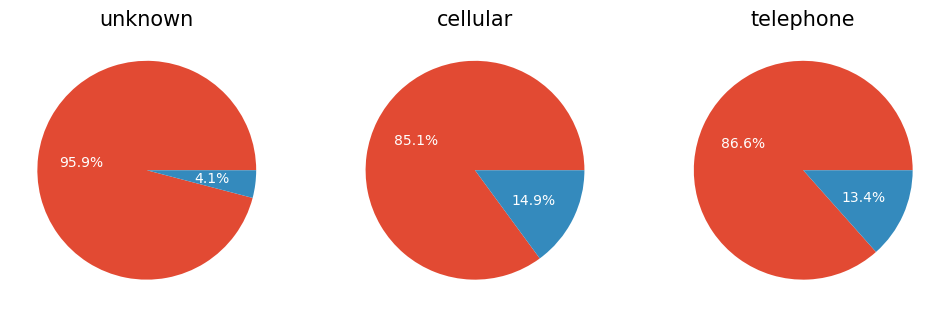

In [137]:
fig,ax=plt.subplots(1,df['contact'].nunique(),figsize=(12,10))
for i,col in enumerate(df['contact'].unique()):
    ax[i].pie(x=df[df['contact']==col]['y'].value_counts(),
              labels=df[df['contact']==col]['y'].value_counts().index,autopct='%1.1f%%', shadow=True, startangle=90)
    ax[i].set_title(col, color='black', fontsize=15)

People whom have been contacted with telephone have subscribed most, comparing the amount of people contacted, as comapred to cellular and unknown, hence it would be beneficial to target the people who have been contacted with telephone and cellular. For the unknown, we need to collect more data. Although the subcription rate for the unknown method is not high and can be ignored.

## Relationship of Campaign success with Day-of-Month contacted

In [141]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

It would be better to distribute the days into weeks for better understanding of the data.

In [139]:
def week(day):
    if day<8:
        return 'Week1'
    elif day<15:
        return 'Week2'
    elif day<22:
        return 'Week3'
    else:
        return 'Week4'
    
df['week']=df['day'].map(week)    

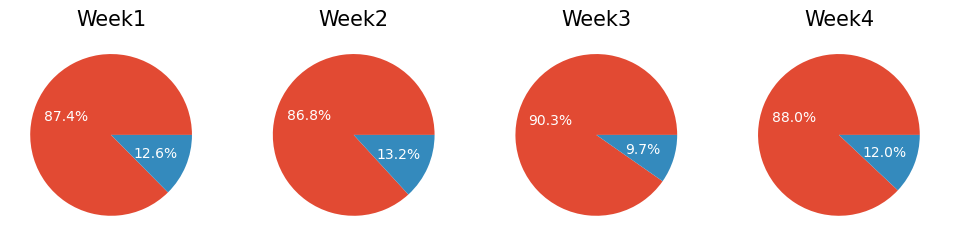

In [140]:
fig,ax=plt.subplots(1,df['week'].nunique(),figsize=(12,10))
for i,col in enumerate(df['week'].unique()):
    ax[i].pie(x=df[df['week']==col]['y'].value_counts(),
              labels=df[df['week']==col]['y'].value_counts().index,autopct='%1.1f%%', shadow=True, startangle=90)
    ax[i].set_title(col, color='black', fontsize=15)

The subscription rate is higher for the first two weeks and last week, as seen previously. Hence, it would be better to target the people in the first two weeks and last week of the month. Although the results were still uniformly distributed.

## Relationship of Campaign success with Month of last call

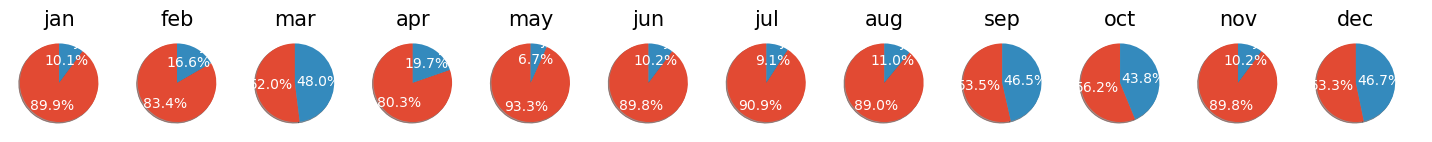

In [143]:
fig,ax=plt.subplots(1,12,figsize=(18,15))
for i,col in enumerate(months):
    ax[i].pie(x=df[df['month']==col]['y'].value_counts(),
              labels=df[df['month']==col]['y'].value_counts().index,autopct='%1.1f%%',shadow=True, startangle=90)
    ax[i].set_title(col, color='black', fontsize=15)

The dependence on monthly column is necessary, as the subscription rate is high for the months of March, September, October and December. Hence, it would be better to target the people in these months.

## Relationship of Campaign success with Duration of last call

In [148]:
# transform duration into minutes
df['duration']=df['duration']/60

In [149]:
disc_dur=KBinsDiscretizer(n_bins=6,strategy='quantile',encode='ordinal')
disc_dur.fit(df[['duration']])
df['duration_rank']=disc_dur.transform(df[['duration']])

In [150]:
disc_dur.bin_edges_

array([array([ 0.        ,  1.33333333,  2.1       ,  3.        ,  4.3       ,
               6.85      , 81.96666667])                                      ],
      dtype=object)

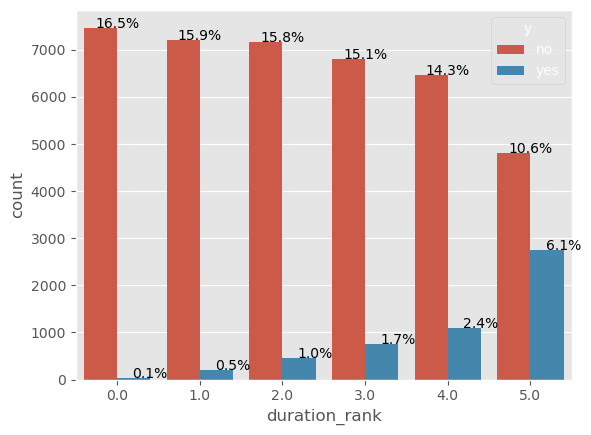

In [152]:
ax=sns.countplot(data=df,x='duration_rank',hue='y')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', color='black')

In [153]:
def call_time(time):
    if time<=1:
        return '<1min'
    elif time<=3:
        return '1-3min'
    elif time<=10:
        return '3-10min'
    else:
        return '>10 min'

In [154]:
df['call_dur']=df['duration'].map(call_time)

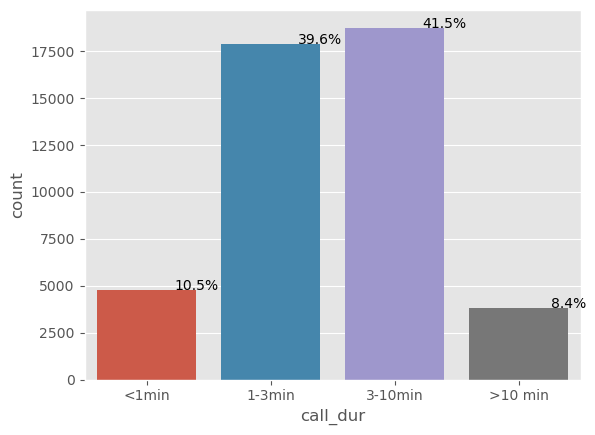

In [156]:
ax=sns.countplot(data=df,x='call_dur',order=['<1min','1-3min','3-10min','>10 min'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', color='black')

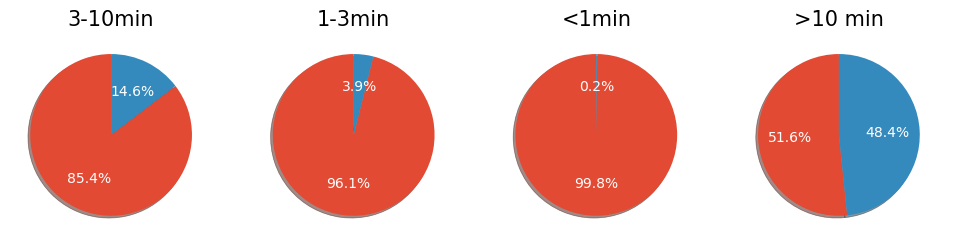

In [159]:
fig,ax=plt.subplots(1,df['call_dur'].nunique(),figsize=(12,10))
for i,col in enumerate(df['call_dur'].unique()):
    ax[i].pie(x=df[df['call_dur']==col]['y'].value_counts(),
              labels=df[df['call_dur']==col]['y'].value_counts().index,autopct='%1.1f%%' , shadow=True, startangle=90)
    ax[i].set_title(col, color='black', fontsize=15)

The subscription rate is high for the people who have been contacted for a longer duration. This indicates that people who have been contacted for longer period of time have been able to understand about the term plan easily, thus duration is one of the most important factor here.

## Relationship of Campaign success with Nos of contacts during this campaign

(-1.0, 25.0)

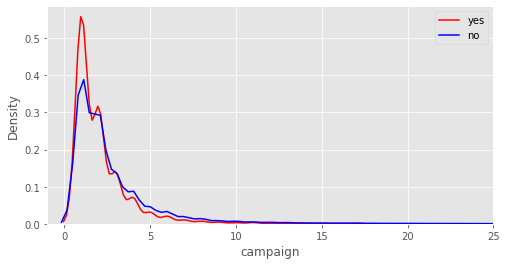

In [71]:
fig,ax=plt.subplots(figsize=(8,4))
sns.distplot(df[df['y']=='yes']['campaign'],color='red',hist=False,ax=ax,label='yes')
sns.distplot(df[df['y']=='no']['campaign'],color='blue',hist=False,ax=ax,label='no')
ax.legend()
ax.set_xlim(-1,25)

As evident from the previous the plot, the number of acceptance of subcription is high withn calls less than 5

## Relationship of Campaign success with nos of days of last contact

In [72]:
df['pdays'].describe().T

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

We can divide into customers who are newly contacted (pdays=-1) and customers who have been previously contacted (!=-1)

In [161]:
df['new_contact']=df['pdays'].apply(lambda x:'new_cust' if x==-1 else 'old_cust')

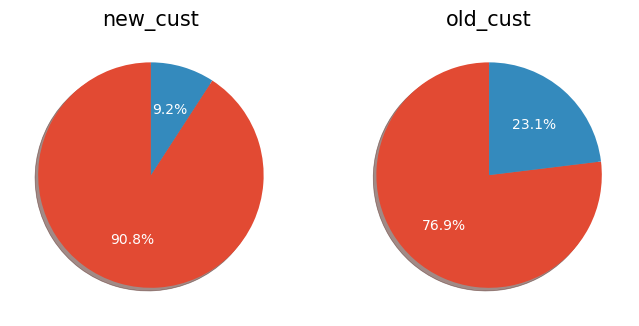

In [162]:
fig,ax=plt.subplots(1,df['new_contact'].nunique(),figsize=(8,6))
for i,col in enumerate(df['new_contact'].unique()):
    ax[i].pie(x=df[df['new_contact']==col]['y'].value_counts(),
              labels=df[df['new_contact']==col]['y'].value_counts().index,autopct='%1.1f%%', shadow=True, startangle=90)
    ax[i].set_title(col, color='black', fontsize=15)

The old customers that were previously contacted have a higher subscription rate, as compared to the newly contacted customers.


## Relationship of Campaign success with Outcome of Previous Campaign

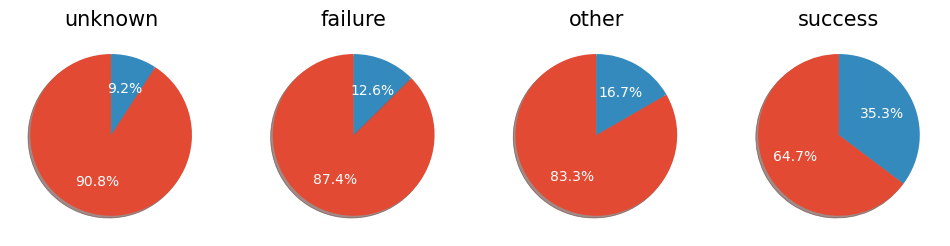

In [164]:
fig,ax=plt.subplots(1,df['poutcome'].nunique(),figsize=(12,10))
for i,col in enumerate(df['poutcome'].unique()):
    ax[i].pie(x=df[df['poutcome']==col]['y'].value_counts(),
              labels=df[df['poutcome']==col]['y'].value_counts().index,autopct='%1.1f%%', shadow=True, startangle=90)
    ax[i].set_title(col, color='black', fontsize=15)

If in previous campaign, they subscribed, it is highly probable that they will subscribe in current campaign as well.  
'Other' possibly means that their previous term deposit is under process, and they are also likely to convert.  
Also, cause of unknown outcome need to be explored to derive more insights.

# A Review of the current dataset

Let's Review the current dataset and its columns

In [77]:
df.sample(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_rank,age_group,job_type,balance_pos,balance_rank,bal_range,week,duration_rank,call_dur,new_contact
2908,42,self-employed,married,primary,no,3641,yes,no,unknown,14,may,14.483333,1,-1,0,unknown,no,3.0,middle,self_employed,yes,9.0,very_high_bal,Week2,4.0,>10 min,new_cust
7937,47,blue-collar,married,primary,no,1092,no,yes,unknown,30,may,0.683333,8,-1,0,unknown,no,3.0,middle,blue_collar,yes,6.0,high_bal,Week4,0.0,<1min,new_cust
39114,36,services,single,secondary,no,165,yes,no,cellular,18,may,3.033333,2,-1,0,unknown,no,2.0,middle,blue_collar,yes,3.0,medium_bal,Week3,2.0,3-10min,new_cust
45163,71,retired,married,secondary,no,2064,no,no,cellular,9,nov,6.316667,2,92,3,failure,no,4.0,senior,retired,yes,8.0,very_high_bal,Week2,4.0,3-10min,old_cust


# Train-Test Split and Feature Selection

In [10]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [11]:
features=['age', 'job', 'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign']

In [12]:
full_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
X=full_data[features]
y=full_data['y'].apply(lambda x: 1 if x=='yes' else 0)

In [14]:
X['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [15]:
def job_new(job):
    if job in ['self-employed','housemaid','entrepreneur']:
        return 'self_employed'
    elif job in ['unknown','unemployed','student']:
        return 'unemployed'
    elif job in ['blue-collar','services']:
        return 'blue_collar'
    else:
        return job

In [16]:
X['job']=X['job'].apply(job_new)

In [17]:
X = pd.get_dummies(X, columns=['job', 'education', 'default', 'housing', 'loan'], drop_first=True)

80-20 split is used for train-test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36168, 16)
(9043, 16)
(36168,)
(9043,)


## Outlier Capping

Let's create a function to cap Outliers.  
We will be using IQR method, ie upper whisker=Q3+1.5 IQR and lower whisker=Q1-1.5 IQR.  
Values beyond the whiskers will be re-assigned the whisker values.

In [20]:
def outlier_capping(df,col):

        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        
        upper_whisker=q3 + 1.5 * iqr
        lower_whisker=q1- 1.5 * iqr
        
        df[col]=np.where(df[col]>upper_whisker,upper_whisker, #true action
                        np.where(df[col]<lower_whisker,lower_whisker,df[col]))

Text(0.5, 1.0, 'Before Outlier Capping')

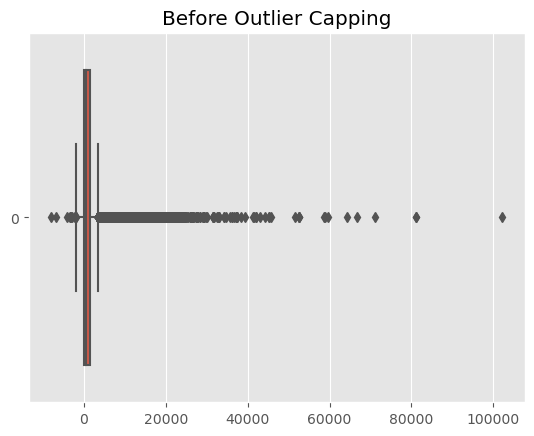

In [21]:
sns.boxplot(X_train['balance'], orient='h')
plt.title('Before Outlier Capping')

In [22]:
outlier_cols=['age','balance','duration','campaign']
for col in outlier_cols:
    outlier_capping(X_train,col)

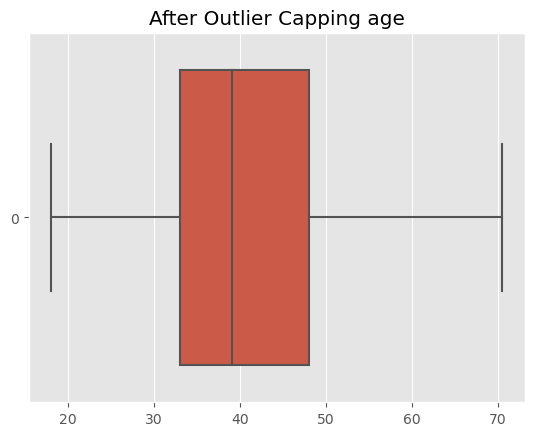

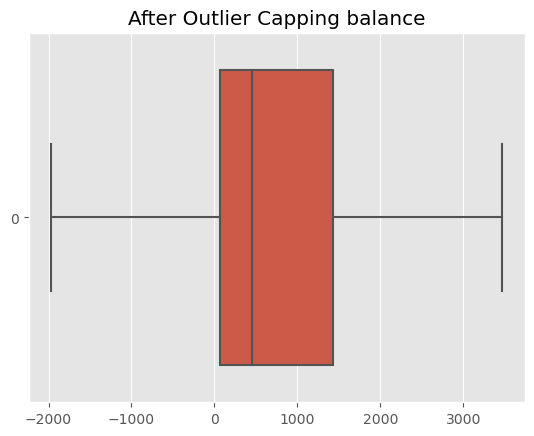

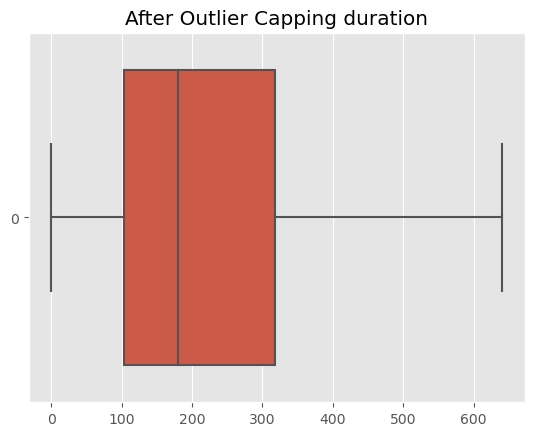

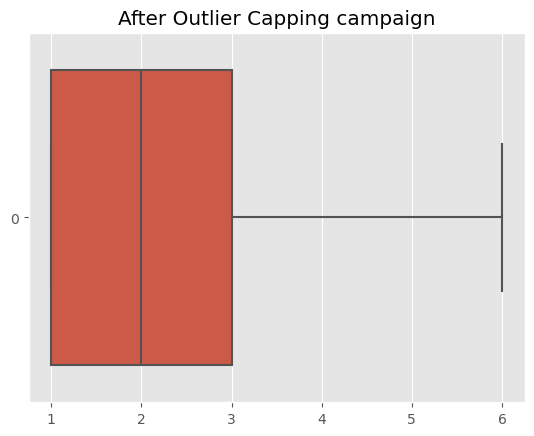

In [23]:
for i in outlier_cols:
    sns.boxplot(X_train[i], orient='h')
    plt.title(f'After Outlier Capping {i}')
    plt.show()

In [59]:
X_train.columns

Index(['age', 'balance', 'duration', 'campaign', 'job_blue_collar',
       'job_management', 'job_retired', 'job_self_employed', 'job_technician',
       'job_unemployed', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_yes', 'loan_yes'],
      dtype='object')

# Training Models and Evaluation

In [60]:
def train(model,X_train,X_test,y_train,y_test):
    print(model)
    model.fit(X_train,y_train)
    
    y_pred=model.predict(X_test)
    
    accuracy=accuracy_score(y_test,y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    return accuracy

In [61]:
# creating a model dictionary
model_dict={'Random Forest':RandomForestClassifier(n_estimators=50,max_depth=5,n_jobs=-1,random_state=50),
           'Logit': LogisticRegression(random_state=50),
           'AdaBoost':AdaBoostClassifier(n_estimators=50,random_state=50),
           'SGD_Classifier': SGDClassifier(loss='log', random_state=50),
           'SVM': svm.SVC(random_state=50),
           'KNN': KNeighborsClassifier(n_neighbors=5),
           'GaussianNB': GaussianNB()}

In [62]:
accuracy_dict={}
for model in model_dict.keys():
    accuracy=train(model_dict[model],X_train,X_test,y_train,y_test)
    
    accuracy_dict[model]=round(accuracy*100, 3)
    print()

RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=50)
Accuracy: 87.95%

LogisticRegression(random_state=50)
Accuracy: 87.86%

AdaBoostClassifier(random_state=50)
Accuracy: 88.37%

SGDClassifier(loss='log', random_state=50)
Accuracy: 85.19%

SVC(random_state=50)
Accuracy: 87.94%

KNeighborsClassifier()
Accuracy: 87.38%

GaussianNB()
Accuracy: 80.57%



In [63]:
accuracy_ser=pd.Series(accuracy_dict)
accuracy_ser

Random Forest     87.946
Logit             87.858
AdaBoost          88.367
SGD_Classifier    85.193
SVM               87.935
KNN               87.383
GaussianNB        80.571
dtype: float64

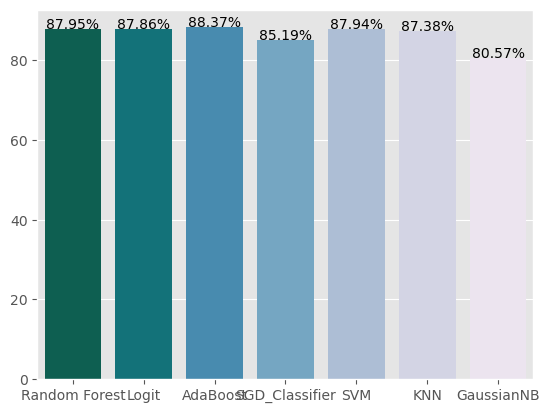

In [64]:
ax = sns.barplot(x=accuracy_ser.index, y=accuracy_ser.values, palette='PuBuGn_r')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.2f}%'.format(accuracy_ser.values[i]), (x, y), ha='center', color='black')
plt.show()

In [65]:
for i in model_dict.keys():
    print(i,':')
    print( classification_report(y_test, model_dict[i].predict(X_test)))

Random Forest :
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.52      0.01      0.03      1091

    accuracy                           0.88      9043
   macro avg       0.70      0.51      0.48      9043
weighted avg       0.84      0.88      0.83      9043

Logit :
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7952
           1       0.50      0.36      0.42      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.66      0.68      9043
weighted avg       0.87      0.88      0.87      9043

AdaBoost :
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7952
           1       0.54      0.24      0.34      1091

    accuracy                           0.88      9043
   macro avg       0.72      0.61      0.64      9043
weighted avg       0.86      0.88      

Classifiers used above show similar result of average accuracy of 87-88% on the dataset. This happened because of the imbalance in the dataset, considering many unknown values in the dataset. Hence more data collection is required to improve the accuracy of the present model. Considering classifiers such as Logisitic Regression, SVM, Random Forest, KNN, Naive Bayes, etc. we can see that the accuracy is similar for all the classifiers. Hence, we can choose any of the classifiers for our model. This is due to the fact that the dataset is imbalanced, and the accuracy is not a good measure of the model performance. Hence, we will be using the F1 score to evaluate the model performance.

# Trying Different Dimension Analysis of Data

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(X_train)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.013071,-0.071920,-0.920994,-0.868989,1.497338,-0.511484,-0.229856,-0.325557,-0.450237,-0.241811,-1.032947,-0.641260,-0.206776,-0.138113,0.892343,-0.438594
1,0.782418,0.407506,0.199777,-0.244109,-0.667852,-0.511484,-0.229856,-0.325557,2.221052,-0.241811,-1.032947,-0.641260,-0.206776,-0.138113,0.892343,-0.438594
2,0.109240,2.146059,-0.591021,1.005652,-0.667852,-0.511484,-0.229856,-0.325557,-0.450237,-0.241811,0.968104,-0.641260,-0.206776,-0.138113,-1.120646,-0.438594
3,-0.371602,-0.891856,0.802832,2.255413,-0.667852,1.955096,-0.229856,-0.325557,-0.450237,-0.241811,-1.032947,1.559431,-0.206776,-0.138113,0.892343,-0.438594
4,1.455596,2.146059,0.171331,-0.244109,1.497338,-0.511484,-0.229856,-0.325557,-0.450237,-0.241811,-1.032947,-0.641260,-0.206776,-0.138113,-1.120646,-0.438594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,0.301576,0.105959,2.313314,-0.868989,-0.667852,-0.511484,-0.229856,3.071658,-0.450237,-0.241811,-1.032947,-0.641260,-0.206776,-0.138113,-1.120646,-0.438594
36164,-1.717958,-0.360761,-0.135885,-0.868989,-0.667852,-0.511484,-0.229856,-0.325557,-0.450237,4.135469,-1.032947,1.559431,-0.206776,-0.138113,-1.120646,-0.438594
36165,-0.660107,0.324496,0.029102,-0.868989,-0.667852,-0.511484,-0.229856,-0.325557,2.221052,-0.241811,-1.032947,1.559431,-0.206776,-0.138113,0.892343,-0.438594
36166,-0.756275,-0.651296,-0.699116,-0.868989,-0.667852,-0.511484,4.350549,-0.325557,-0.450237,-0.241811,0.968104,-0.641260,-0.206776,-0.138113,-1.120646,-0.438594


In [25]:
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2', 'PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-0.778710,-0.427909,-1.541795
1,-0.096648,0.301619,1.415343
2,-0.275890,1.063510,0.569333
3,2.339069,-1.536421,-0.464344
4,-0.007399,1.605053,-1.389083


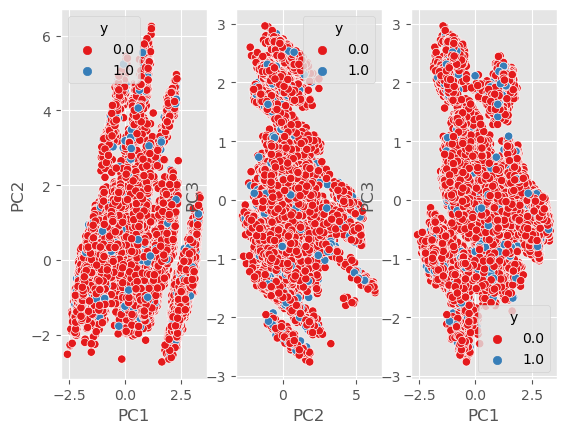

In [27]:
plt.subplot(1,3,1)
sns.scatterplot(x='PC1', y='PC2', data=data_pca, hue=y_train, palette='Set1')

plt.subplot(1,3,2)
sns.scatterplot(x='PC2', y='PC3', data=data_pca, hue=y_train, palette='Set1')

plt.subplot(1,3,3)
sns.scatterplot(x='PC1', y='PC3', data=data_pca, hue=y_train, palette='Set1')
plt.show()

As seen from the above plot, the data is not sepearable by any of the dimensions using PCA. Hence changing the dimensions will not help in improving the model performance. Thus the models, observed above will be used for the prediction, and the best model will be selected based on the F1 score.